# Decision Tree 

In this notebook, we briefly introduce the decision tree model, then apply it on the CVDs dataset and diabetes dataset.

---

## Introduction

[**Decision Trees**](https://en.wikipedia.org/wiki/Decision_tree) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation. 

Decision trees are constructed from only two elements — nodes and branches. The nodes fall under the following types of nodes:

* Root node — node at the top of the tree. This node acts as the input node for feature vectors in the model. 
* Decision nodes — nodes where the variables are evaluated. These nodes have arrows pointing to them and away from them.
* Leaf nodes — final nodes at which the prediction is made.

---

## Algorithm

Scikit-Learn uses the Classification and Regression Tree (CART) algorithm to train Decision Trees. The algorithm works by first splitting the training set into two subsets using a single feature $k$ and a threshold $t_k$. How does it choose $k$ and $t_k$? It searches for the pair $(k, t_k)$ that
produces the purest subsets (weighted by their size). Equation below gives the cost function that the algorithm tries to minimize.

$$
J(k, t_k) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right}, 
$$

where $G_{left/rihgt}$ measures the impurity of the left/right subset, $m_{left/right}$ is the number of instances in the left/right subset. 

Once the CART algorithm has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets, and so on, recursively. It stops recursing once it reaches the maximum depth, or if it cannot find a split that will reduce impurity.

Typically, we can use *Gini score* or *Entropy* to measure the impurity. Equations below show how the training algorithm computes the gini score and entropy of the $i^{th}$ node.

$$
\begin{aligned}
G_i &= 1 - \sum_{k=1}^n p_{i,k}^2,\\
H_i &= -\sum_{k=1,\,p_{i,k}\ne 0}^n p_{i,k} \log_2(p_{i,k}).
\end{aligned}
$$
where $p_{i,k}$ is the ratio of class $k$ instances among the training instances in the $i^{th}$ node.

Decision Trees are also capable of performing regression tasks. The CART algorithm works mostly the same way as earlier, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that minimizes the MSE.

$$
J(k, t_k) = \frac{m_{left}}{m} \text{MSE}_{left} + \frac{m_{right}}{m} \text{MSE}_{right}, 
$$

where $\text{MSE}_{node} = \sum_{i \in node} (\hat{y}_{node} - y^{(i)})^2$ and $\hat{y}_{node} = \frac1{m_{node}} \sum_{i \in node} y^{(i)}$.

--- 

## Advantages and Disadvantages 
### Advantages 
* Are simple to understand and interpret. People are able to understand decision tree models after a brief explanation.
* Have value even with little hard data. Important insights can be generated based on experts describing a situation (its alternatives, probabilities, and costs) and their preferences for outcomes.
* Help determine worst, best, and expected values for different scenarios.
* Use a white box model. If a given result is provided by a model.
* Can be combined with other decision techniques.

### Disadvantages 
* They are unstable, meaning that a small change in the data can lead to a large change in the structure of the optimal decision tree.
* They are often relatively inaccurate. Many other predictors perform better with similar data. This can be remedied by replacing a single decision tree with a random forest of decision trees, but a random forest is not as easy to interpret as a single decision tree.
* For data including categorical variables with different numbers of levels, information gain in decision trees is biased in favor of those attributes with more levels.
* Calculations can get very complex, particularly if many values are uncertain and/or if many outcomes are linked.

---

## Decision Tree Classifier

In [1]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Set theme for plotting
sns.set_theme()

In [2]:
# Import the data
df = pd.read_csv("https://raw.githubusercontent.com/YulinLi98/Sample_Repo/main/heart.csv")

# Data Preprocessing by onehot encoding
df.Sex = df.Sex.replace({'M':1, 'F':0})
df.ExerciseAngina = df.ExerciseAngina.replace({'Y':1, 'N':0})

ChestPainType = pd.get_dummies(df.ChestPainType,drop_first=True)
RestingECG = pd.get_dummies(df.RestingECG,drop_first=True)
ST_Slope = pd.get_dummies(df.ST_Slope,drop_first=True)
df = pd.concat([df,ChestPainType, RestingECG, ST_Slope],axis=1)
df.drop(['ChestPainType', 'RestingECG', 'ST_Slope'],axis=1,inplace=True)

# Standardize the data
df.Age = preprocessing.scale(df.Age)
df.RestingBP = preprocessing.scale(df.RestingBP)
df.MaxHR = preprocessing.scale(df.MaxHR)
df.Cholesterol = preprocessing.scale(df.Cholesterol)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ATA,NAP,TA,Normal,ST,Flat,Up
0,-1.433140,1,0.410909,0.825070,0,1.382928,0,0.0,0,1,0,0,1,0,0,1
1,-0.478484,0,1.491752,-0.171961,0,0.754157,0,1.0,1,0,1,0,1,0,1,0
2,-1.751359,1,-0.129513,0.770188,0,-1.525138,0,0.0,0,1,0,0,0,1,0,1
3,-0.584556,0,0.302825,0.139040,0,-1.132156,1,1.5,1,0,0,0,1,0,1,0
4,0.051881,1,0.951331,-0.034755,0,-0.581981,0,0.0,0,0,1,0,1,0,0,1


In [3]:
X = df.drop('HeartDisease',axis=1)
y = df.HeartDisease

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate an instance of the DecisionTreeClassifier model
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
# Train the model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

|--- Up <= 0.50
|   |--- ExerciseAngina <= 0.50
|   |   |--- Sex <= 0.50
|   |   |   |--- RestingBP <= 0.68
|   |   |   |   |--- Cholesterol <= 0.71
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Cholesterol >  0.71
|   |   |   |   |   |--- class: 1
|   |   |   |--- RestingBP >  0.68
|   |   |   |   |--- TA <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- TA >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- Sex >  0.50
|   |   |   |--- Oldpeak <= 0.05
|   |   |   |   |--- ATA <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- ATA >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Oldpeak >  0.05
|   |   |   |   |--- Oldpeak <= 1.30
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Oldpeak >  1.30
|   |   |   |   |   |--- class: 1
|   |--- ExerciseAngina >  0.50
|   |   |--- RestingBP <= -1.08
|   |   |   |--- Normal <= 0.50
|   |   |   |   |--- Oldpeak <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Oldpeak >  0.50
|   

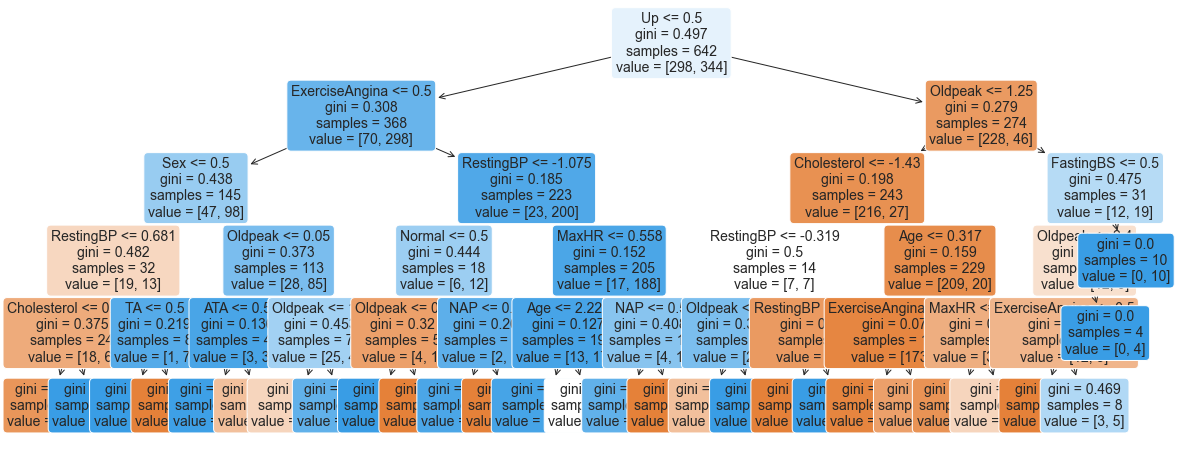

In [5]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                        feature_names= X.columns.to_list())
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                feature_names=X.columns.to_list(),
                rounded = True,
                filled = True, 
                fontsize=14)
plt.show()

cf_matrix = [[ 93  19]
 [ 48 116]] 



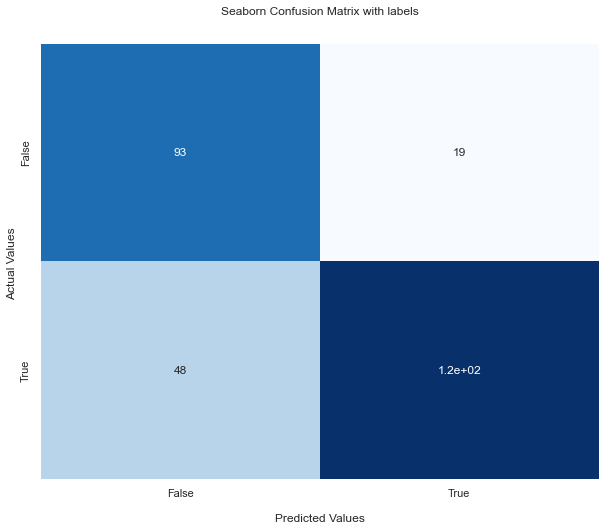

In [6]:
# predicted values on the testing data
y_pred = decision_tree.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [7]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.83      0.74       112
           1       0.86      0.71      0.78       164

    accuracy                           0.76       276
   macro avg       0.76      0.77      0.76       276
weighted avg       0.78      0.76      0.76       276



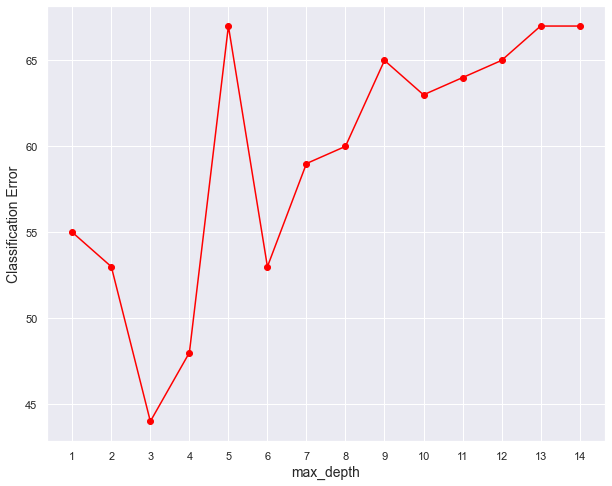

In [8]:
# Experiment with different max_depth
depths = [x for x in range(1, 15)]
errors = []
for depth in depths:
    decision_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    error = sum(y_pred != y_test)
    errors.append(error)

plt.figure(figsize = (10, 8))
plt.plot(depths, errors, color = 'red')
plt.scatter(depths, errors, color = 'red')
plt.xlabel('max_depth', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(depths)
plt.show()

We can see that the decision tree classifier model has the highest accuracy at max_depth = 3.

|--- Up <= 0.50
|   |--- ExerciseAngina <= 0.50
|   |   |--- Sex <= 0.50
|   |   |   |--- class: 0
|   |   |--- Sex >  0.50
|   |   |   |--- class: 1
|   |--- ExerciseAngina >  0.50
|   |   |--- RestingBP <= -1.08
|   |   |   |--- class: 1
|   |   |--- RestingBP >  -1.08
|   |   |   |--- class: 1
|--- Up >  0.50
|   |--- Oldpeak <= 1.25
|   |   |--- Cholesterol <= -1.43
|   |   |   |--- class: 0
|   |   |--- Cholesterol >  -1.43
|   |   |   |--- class: 0
|   |--- Oldpeak >  1.25
|   |   |--- FastingBS <= 0.50
|   |   |   |--- class: 0
|   |   |--- FastingBS >  0.50
|   |   |   |--- class: 1
 



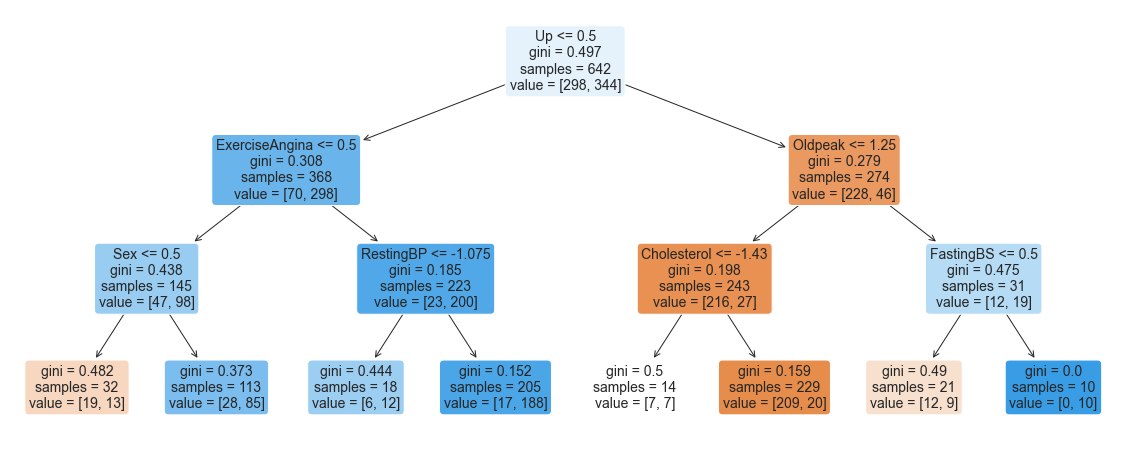

In [9]:
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

tree_rules = export_text(decision_tree,
                        feature_names= X.columns.to_list())
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                feature_names=X.columns.to_list(),
                rounded = True,
                filled = True, 
                fontsize=14)
plt.show()

cf_matrix = [[ 98  14]
 [ 30 134]] 



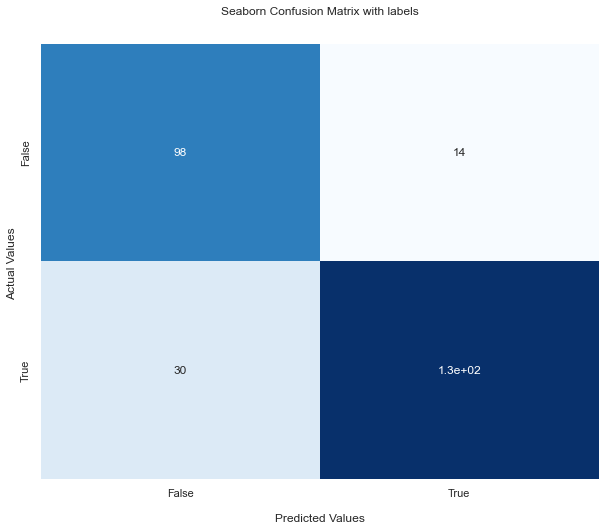

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       112
           1       0.91      0.82      0.86       164

    accuracy                           0.84       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.84      0.84       276



In [10]:
# predicted values on the testing data
y_pred = decision_tree.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

The accuracy for decision tree model is 0.84, which is a little bit better than the single neuron perceptron model, but less effective than other constructed models. 

---

## Decision Tree Regressor

In this part, we will implement decision tree regressor using scikit-learn, then apply it on diabetes dataset from scikit-learn.


In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data,columns = ['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'])
df['target'] = diabetes.target
X = df.drop('target',axis=1)     # the response variables
y = df.target                    # the exploratory variable

# scale the data
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

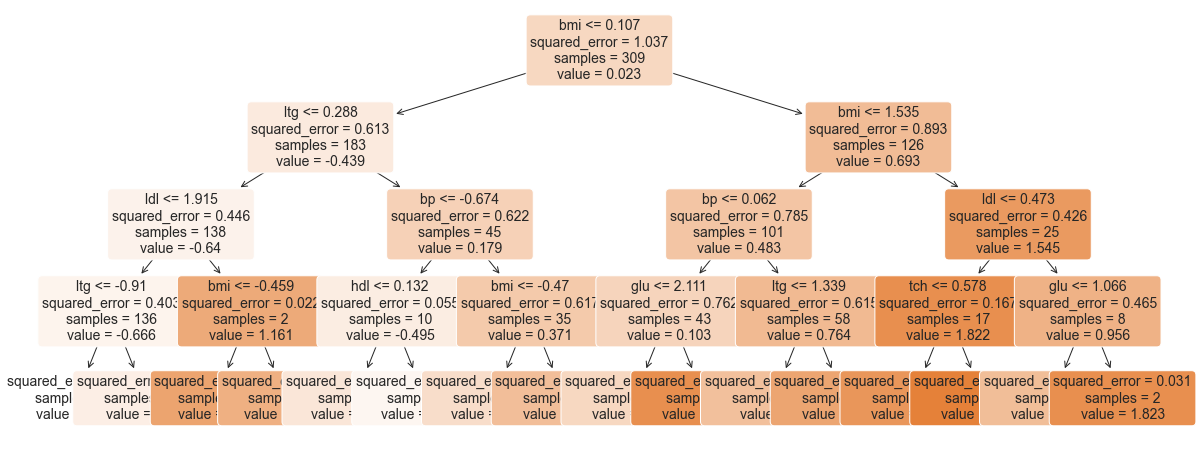

In [12]:
# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=42)

# Instantiate an instance of the DecisionTreeRegressor model
reg = DecisionTreeRegressor(max_depth=4, random_state=42)
reg.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20, 8))
a = plot_tree(reg,
                feature_names=X.columns.to_list(),
                rounded = True,
                filled = True, 
                fontsize=14)
plt.show()

In [13]:
y_pred = reg.predict(X_test)
print(f"MSE for reg is: {mean_squared_error(y_test, y_pred)} \n")
print(f"The R^2 for reg is: {round(r2_score(y_test, y_pred), 3)}")

MSE for reg is: 0.5874429374145208 

The R^2 for reg is: 0.355


The $R^2$ value shows that the decision tree regressor does not predict well. Now let's try to do some experiment with different depth.

Text(0.5, 1.0, 'adjusted $R^2$ for different max_depth')

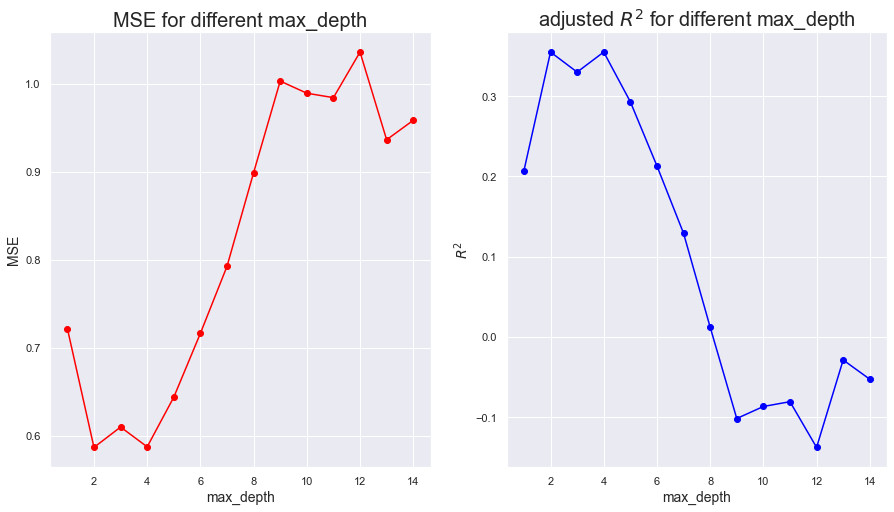

In [14]:
# Experiment with different max_depth
depths = [x for x in range(1, 15)]
MSE = []
R2 = []
for depth in depths:
    reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    MSE.append(mse)
    r2 = round(r2_score(y_test, y_pred), 3)
    R2.append(r2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.scatter(depths, MSE, color = "red")
ax1.plot(depths, MSE, color = 'red')
ax1.set_xlabel("max_depth", fontsize = 14)
ax1.set_ylabel("MSE", fontsize = 14)
ax1.set_title('MSE for different max_depth', fontsize = 20)

ax2.scatter(depths, R2, color = "blue")
ax2.plot(depths, R2, color = 'blue')
ax2.set_xlabel("max_depth", fontsize = 14)
ax2.set_ylabel("$R^2$", fontsize = 14)
ax2.set_title('adjusted $R^2$ for different max_depth', fontsize = 20)


The maximum of adjusted $R^2$ is less than 0.4. As the max_depth increases, the value of adjuested $R^2$ even decreases to less than 0. The performance of decision tree regressor is poorer than the k-NN regressor on diabetes dataset. In this case, the decision tree regressor is not an ideal model to do the regression. 